### Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished. 

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant. 

-1: Means clusters are assigned in the wrong way.

### Silhouette Score = (b-a)/max(a,b)

a= average intra-cluster distance i.e the average distance between each point within a cluster.

b= average inter-cluster distance i.e the average distance between all clusters.


In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt 
%matplotlib inline

In [77]:
# Generating 100 random data points to cluster
X= np.random.rand(50,2)
print("X ", X)
Y= 2 + np.random.rand(50,2)
print("Y ", Y)
Z= np.concatenate((X,Y))
print("Z ", Z)
Z=pd.DataFrame(Z) #converting into data frame for ease
Z.head()

X  [[0.05479838 0.70086374]
 [0.88074694 0.19530161]
 [0.96912063 0.61003074]
 [0.87495665 0.36549205]
 [0.88949566 0.50249316]
 [0.01551867 0.93242963]
 [0.71437248 0.87657979]
 [0.68714353 0.53509044]
 [0.73358504 0.27417366]
 [0.52141989 0.49995626]
 [0.69356813 0.33611505]
 [0.29379397 0.94481539]
 [0.70150463 0.40398493]
 [0.50015221 0.74923645]
 [0.09630772 0.78597643]
 [0.79635163 0.20216395]
 [0.44953055 0.70261746]
 [0.00494239 0.53773329]
 [0.4987119  0.6774358 ]
 [0.28284839 0.90766001]
 [0.78657644 0.09923983]
 [0.93507071 0.09757864]
 [0.24275623 0.19468446]
 [0.55915425 0.78919048]
 [0.6405766  0.13256096]
 [0.6963939  0.34530299]
 [0.44984471 0.37065257]
 [0.03905576 0.22782667]
 [0.35289607 0.09397846]
 [0.77708335 0.22691828]
 [0.085444   0.16868694]
 [0.2355223  0.34483777]
 [0.23936264 0.02770417]
 [0.63371866 0.10239025]
 [0.3051491  0.74620521]
 [0.44040654 0.74791032]
 [0.80240222 0.80054127]
 [0.03655241 0.41838056]
 [0.76036211 0.6049864 ]
 [0.87338549 0.8575723

,0,1
0,0.054798,0.700864
1,0.880747,0.195302
2,0.969121,0.610031
3,0.874957,0.365492
4,0.889496,0.502493


<AxesSubplot:xlabel='0', ylabel='1'>

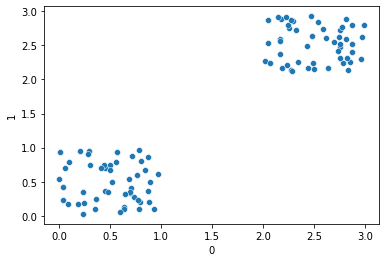

In [78]:
# Plotting
sns.scatterplot(Z[0],Z[1]) # (x,y)


In [79]:
# Applying KMeans clustering --> 2 clusters!

KMean = KMeans(n_clusters=2) 
KMean.fit(Z)
label=KMean.predict(Z)

In [80]:
# Calculating the Silhouette score, using the function

print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')

Silhouette Score(n=2): 0.8194596267557117


<AxesSubplot:xlabel='0', ylabel='1'>

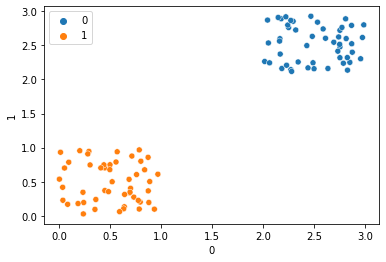

In [81]:
# Plot again but this time with labelled data points and showing clusters in different colors

sns.scatterplot(Z[0],Z[1],hue=label)


## Waddle dataaa

In [82]:
data = pd.read_csv('../../data/cleanData/oneEncodedDiscord.csv')
X = data.iloc[:,[6,7]].values

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  sil.append(silhouette_score(X, labels, metric = 'euclidean'))

print(sil)


[0.4210327393026527, 0.47808187375602995, 0.3902394550895183, 0.4549819386745339, 0.4170563201008361, 0.42907022575201575, 0.41224528796678617, 0.4560758935914882, 0.443027863374928]


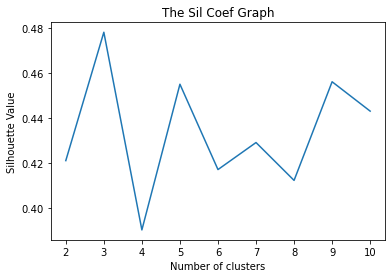

In [83]:
plt.plot(range(2, kmax+1), sil)
plt.title('The Sil Coef Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Value')
plt.show()

In [84]:
# Finding the max cluster value
max_y = max(sil)
max_cluster=range(2,kmax+1)[sil.index(max_y)]

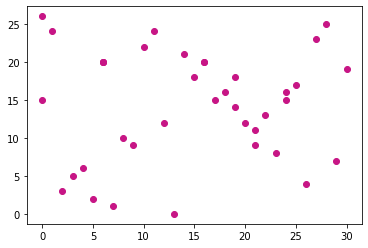

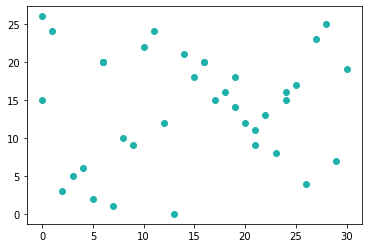

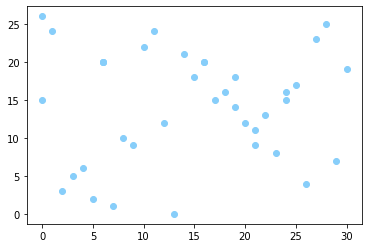

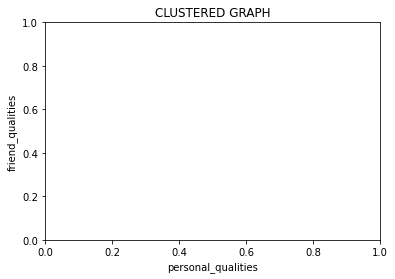

In [87]:
# Plotting data
color=['mediumvioletred','lightseagreen','lightskyblue', 'mediumslateblue', 'gold']
for k in range(max_cluster):
    plt.scatter(data["personal_qualities"],data["friend_qualities"],c=color[k])
    plt.show()
plt.title('CLUSTERED GRAPH')
plt.xlabel('personal_qualities')
plt.ylabel('friend_qualities')
plt.show()